# Get Arb data from db and plot it

In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
import mysql.connector
from datetime import datetime
from dateutil import parser
def getData(PREFIX):
    cnx = mysql.connector.connect(user='robot', password='robot',
                              host='webfx-portf',
                              auth_plugin='mysql_native_password',
                              database='arbtrader')
    VALUE="arbevt-profit"    
    df = pd.read_sql(("select tmstamp,double_val from arbtrader.data_point as d, arbtrader.data_name as p " \
    "WHERE d.tmstamp > '2025-03-01' AND p.prefix = '"+PREFIX+"'" \
    "AND d.data_id = p.id AND p.name like '"+VALUE+"' order by long_val asc"),cnx)
    cnx.close()
    df.index = pd.to_datetime(df['tmstamp'])    
    del df['tmstamp']
    #df.columns=[ticker]
    return df;

def getBulkData(symlist):
    print("Getting data..")
    bdata = pd.DataFrame()
    for sym in symlist:
        tdata = getData(sym)       
        if (len(tdata) > 110):
            if len(bdata)==0:
                bdata = tdata
            else:
                bdata = bdata.join(tdata, how='inner')
        else:
             print("skipping "+sym+":"+str(len(tdata)))
    print("Done\n")
    return bdata

/tmp/ipykernel_23155/1852293572.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



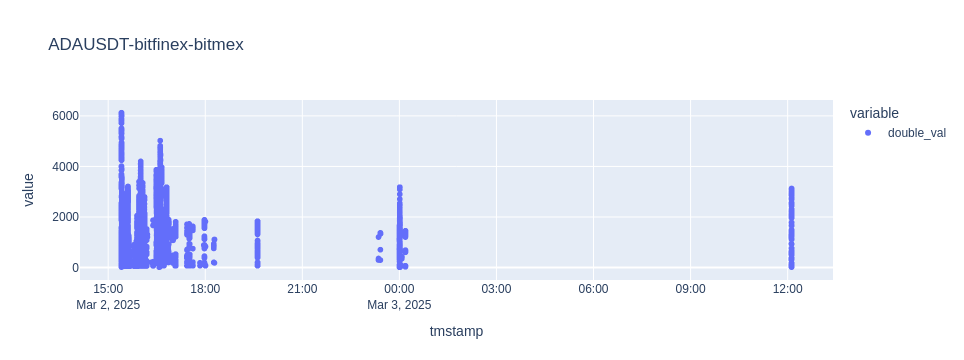

/tmp/ipykernel_23155/1852293572.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



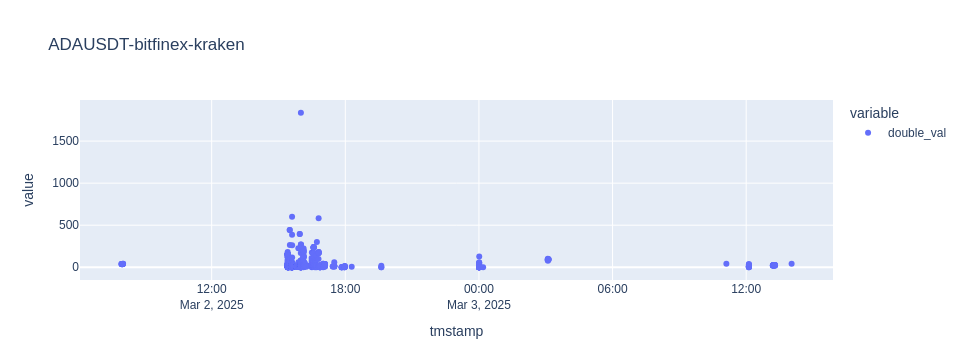

/tmp/ipykernel_23155/1852293572.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



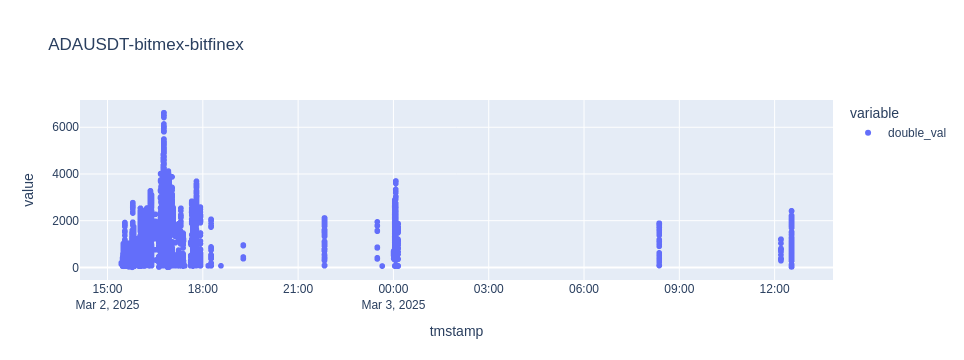

/tmp/ipykernel_23155/1852293572.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



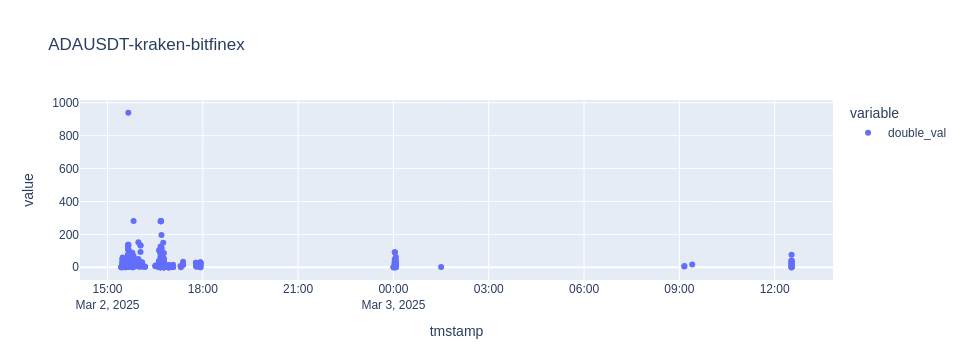

In [46]:
ops=['ADAUSDT-bitfinex-bitmex',
     'ADAUSDT-bitfinex-kraken',
    'ADAUSDT-bitmex-bitfinex',
    'ADAUSDT-kraken-bitfinex']

for i in ops:
    df=getData(i)
    fig = px.scatter(df,title=i)
    fig.show()


/tmp/ipykernel_23155/1852293572.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



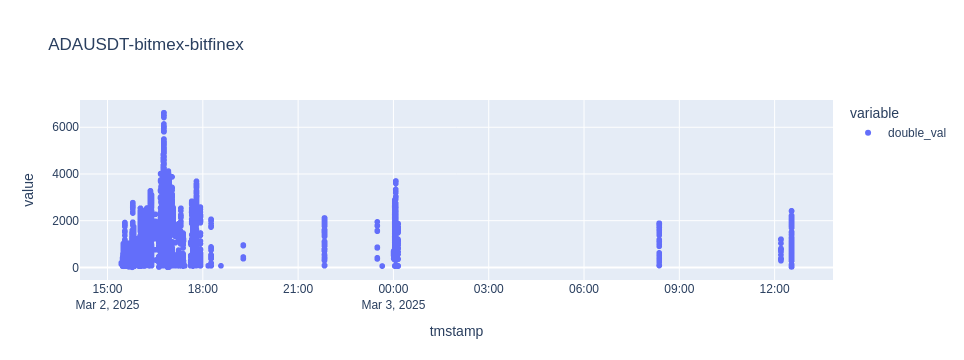